#用截断奇异值分解降维

截断奇异值分解（Truncated singular value decomposition，TSVD）是一种矩阵因式分解（factorization）技术，将矩阵$M$分解成$U$，$\Sigma$和$V$。它与PCA很像，只是SVD分解是在数据矩阵上进行，而PCA是在数据的协方差矩阵上进行。通常，SVD用于发现矩阵的主成份。

<!-- TEASER_END -->

##Getting ready

TSVD与一般SVD不同的是它可以产生一个指定维度的分解矩阵。例如，有一个$n \times n$矩阵，通过SVD分解后仍然是一个$n \times n$矩阵，而TSVD可以生成指定维度的矩阵。这样就可以实现降维了。

这里我们还用`iris`数据集来演示TSVD：

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data

##How to do it...

TSVD对象的用法和其他对象类似。首先导入需要的类，初始化，然后拟合：

In [5]:
from sklearn.decomposition import TruncatedSVD

In [6]:
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [7]:
iris_transformed[:5]

array([[ 5.91220352, -2.30344211],
       [ 5.57207573, -1.97383104],
       [ 5.4464847 , -2.09653267],
       [ 5.43601924, -1.87168085],
       [ 5.87506555, -2.32934799]])

最终结果如下图所示：

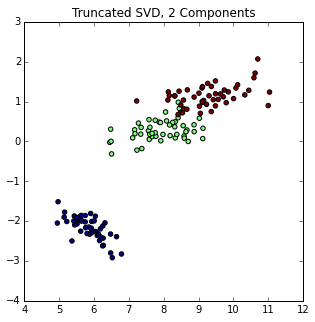

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)

ax.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=iris.target)
ax.set_title("Truncated SVD, 2 Components")

##How it works...

现在我们演示了scikit-learn的`TruncatedSVD`模块，让我们看看只用`scipy`学习一些细节。

首先，我们用`scipy`的`linalg`处理SVD：

In [12]:
import numpy as np
from scipy.linalg import svd
D = np.array([[1, 2], [1, 3], [1, 4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [13]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

我们可以根据SVD的定义，用$U$，$S$和$V$还原矩阵$D$：

In [15]:
np.diag(S)

array([[ 5.64015854,  0.        ],
       [ 0.        ,  0.43429448]])

In [16]:
np.dot(U.dot(np.diag(S)), V)

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

`TruncatedSVD`返回的矩阵是$U$和$S$的点积。如果我们想模拟TSVD，我们就去掉最新奇异值和对于$U$的列向量。例如，我们想要一个主成份，可以这样：

In [17]:
new_S = S[0]
new_U = U[:, 0]
new_U.dot(new_S)

array([-2.20719466, -3.16170819, -4.11622173])

一般情况下，如果我们想要截断维度$t$，那么我们就去掉$N-t$个奇异值。

##There's more...

`TruncatedSVD`还有一些细节需要注意。

###符号翻转（Sign flipping）

`TruncatedSVD`有个“陷阱”。随着随机数生成器状态的变化，`TruncatedSVD`连续地拟合会改变输出的符合。为了避免这个问题，建议只用`TruncatedSVD`拟合一次，然后用其他变换。这正是管线命令的另一个用处。

要避免这种情况，可以这样：

In [23]:
tsvd = TruncatedSVD(2)
tsvd.fit(iris_data)
tsvd.transform(iris_data)[:5]

array([[ 5.91220352, -2.30344211],
       [ 5.57207573, -1.97383104],
       [ 5.4464847 , -2.09653267],
       [ 5.43601924, -1.87168085],
       [ 5.87506555, -2.32934799]])

###稀疏矩阵

`TruncatedSVD`相比PDA的一个优势是`TruncatedSVD`可以操作PDA处理不了的矩阵。这是因为PCA必须计算协方差矩阵，需要在整个矩阵上操作，如果矩阵太大，计算资源可能会不够用。